In [1]:
#importing necessary library
import numpy as np
import pandas as pd

In [2]:
# Reading the CSV file
df = pd.read_csv('Data Set - industrial_safety_and_health_database_with_accidents_description.csv')

In [3]:
#list 3 rows from the dataset
df.head(3)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


**Lets divide Date column in Day, Month and Year**

In [4]:
year =[]
month =[]
date=[]
for x in range(df.shape[0]):
    h = df['Data'][x].split()
    k = h[0].split('-')
    year.append(int(k[0]))
    month.append(int(k[1]))
    date.append(int(k[2]))


In [5]:
dates = list(zip(year,month,date))
df_date = pd.DataFrame(dates, columns = ['Year','Month','Date'])
df_date

,Year,Month,Date
0,2016,1,1
1,2016,1,2
2,2016,1,6
3,2016,1,8
4,2016,1,10
...,...,...,...
420,2017,7,4
421,2017,7,4
422,2017,7,5
423,2017,7,6


Concatenating the date, Month and Year to new_df

In [6]:
df_new =pd.concat([df,df_date],axis=1)


**Droping unwanted columns such as 'Unnamed: 0','Data','Accident Level'. We are droping Accident Level because it shows high level of data imbalance which is not suitable for prediction of data. Taking Potential Accident Level as target column.**

In [7]:
df_new.drop(['Unnamed: 0','Data','Accident Level'],axis=1,inplace=True)

**Converting Potential accident level to numerical format**

In [8]:
Potential_Accident_Level = {
    'I'   :   1,
    'II'  :   2,
    'III' :   3,
    'IV'  :   4,
    'V'   :   5,
    'VI'  :   6
}

**Converting Months to categorical format**

In [9]:
Month_Modified = {
    
    1   :  'January',
    2   :  'February',
    3   :  'March',
    4   :  'April',
    5   :  'May',
    6   :  'June',
    7   :  'July',
    8   :  'August',
    9   :  'September',
    10  :  'October',
    11  :  'November',
    12  :  'December'
    
}

**Mapping Potential Accident Level and Months to new dataframe**

In [10]:
df_new['Potential_Accident_Level'] = df_new['Potential Accident Level'].map(Potential_Accident_Level)
df_new['Month_Modified'] = df_new['Month'].map(Month_Modified)

In [11]:
df_new.drop(['Potential Accident Level','Month'],axis=1,inplace=True)

In [12]:
# converting to string variables
df_new['Year'] = df_new['Year'].astype(str)
df_new['Date'] = df_new['Date'].astype(str)

In [13]:
# Taking y Label for target
y=df_new['Potential_Accident_Level']
df_new.drop('Potential_Accident_Level', axis=1, inplace=True)

In [14]:
for x in df_new.columns:
    df_new[x] = df_new[x] + ' '

In [15]:
df_new['Description']

0      While removing the drill rod of the Jumbo 08 f...
1      During the activation of a sodium sulphide pum...
2      In the sub-station MILPO located at level +170...
3      Being 9:45 am. approximately in the Nv. 1880 C...
4      Approximately at 11:45 a.m. in circumstances t...
                             ...                        
420    Being approximately 5:00 a.m. approximately, w...
421    The collaborator moved from the infrastructure...
422    During the environmental monitoring activity i...
423    The Employee performed the activity of strippi...
424    At 10:00 a.m., when the assistant cleaned the ...
Name: Description, Length: 425, dtype: object

**Cleaning up the data,removing stopwords,remove punctuation, converting them into tokens.**

In [16]:
import string
import re
import os
import nltk

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, twitter_samples 

tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

stopwords_english = stopwords.words('english')


def process_tweet(tweet):
    '''
    Input: 
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    
    '''
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    #remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    ### START CODE HERE ###
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
            word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            tweets_clean.append(word)
    ### END CODE HERE ###
    return tweets_clean


In [17]:
desc_list = []
for x in df_new['Description']:
        desc_list.append(process_tweet(x))

In [18]:
desc_list1 = []
for x in desc_list:
    desc_list1.append(' '.join(x))

In [19]:
desc_list1[0]

'removing drill rod jumbo maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic supports one end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers mechanic drilling bar beam jumbo'

In [20]:
df1 = pd.DataFrame({'New_Description':desc_list1})

In [21]:
df1

,New_Description
0,removing drill rod jumbo maintenance superviso...
1,activation sodium sulphide pump piping uncoupl...
2,sub-station milpo located level collaborator e...
3,approximately nv cx ob personnel begins task u...
4,approximately circumstances mechanics anthony ...
...,...
420,approximately approximately lifting kelly hq t...
421,collaborator moved infrastructure office julio...
422,environmental monitoring activity area employe...
423,employee performed activity stripping cathodes...


In [22]:
df1 = pd.concat([df_new,df1],axis=1)

In [23]:
df1.head(2)

,Countries,Local,Industry Sector,Genre,Employee or Third Party,Critical Risk,Description,Year,Date,Month_Modified,New_Description
0,Country_01,Local_01,Mining,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,January,removing drill rod jumbo maintenance superviso...
1,Country_02,Local_02,Mining,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,January,activation sodium sulphide pump piping uncoupl...


In [24]:
df1.drop('Description',axis=1,inplace=True)

In [25]:
df1.head(2)

,Countries,Local,Industry Sector,Genre,Employee or Third Party,Critical Risk,Year,Date,Month_Modified,New_Description
0,Country_01,Local_01,Mining,Male,Third Party,Pressed,2016,1,January,removing drill rod jumbo maintenance superviso...
1,Country_02,Local_02,Mining,Male,Employee,Pressurized Systems,2016,2,January,activation sodium sulphide pump piping uncoupl...


In [26]:
df1['Description'] = df1.sum(axis=1)
df1.head(2)

,Countries,Local,Industry Sector,Genre,Employee or Third Party,Critical Risk,Year,Date,Month_Modified,New_Description,Description
0,Country_01,Local_01,Mining,Male,Third Party,Pressed,2016,1,January,removing drill rod jumbo maintenance superviso...,Country_01 Local_01 Mining Male Third Party Pr...
1,Country_02,Local_02,Mining,Male,Employee,Pressurized Systems,2016,2,January,activation sodium sulphide pump piping uncoupl...,Country_02 Local_02 Mining Male Employee Press...


**Getting all the columns in description**

In [27]:
df1['Description'][0]

'Country_01 Local_01 Mining Male Third Party Pressed 2016 1 January removing drill rod jumbo maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic supports one end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers mechanic drilling bar beam jumbo'

**Creating vocabulary for the words and passing tokens to each word**

In [28]:
# Build the vocabulary
# Unit Test Note - There is no test set here only train/val

# Include special tokens 
# started with pad, end of line and unk tokens
Vocab = {'__PAD__': 0, '__</e>__': 1, '__UNK__': 2} 

# Note that we build vocab using training data
for sentence in df1['Description']: 
    for word in sentence.split():
        if word not in Vocab: 
            Vocab[word] = len(Vocab)
    
print("Total words in vocab are",len(Vocab))
display(Vocab)

Total words in vocab are 3173


{'__PAD__': 0,
 '__</e>__': 1,
 '__UNK__': 2,
 'Country_01': 3,
 'Local_01': 4,
 'Mining': 5,
 'Male': 6,
 'Third': 7,
 'Party': 8,
 'Pressed': 9,
 '2016': 10,
 '1': 11,
 'January': 12,
 'removing': 13,
 'drill': 14,
 'rod': 15,
 'jumbo': 16,
 'maintenance': 17,
 'supervisor': 18,
 'proceeds': 19,
 'loosen': 20,
 'support': 21,
 'intermediate': 22,
 'centralizer': 23,
 'facilitate': 24,
 'removal': 25,
 'seeing': 26,
 'mechanic': 27,
 'supports': 28,
 'one': 29,
 'end': 30,
 'equipment': 31,
 'pull': 32,
 'hands': 33,
 'bar': 34,
 'accelerate': 35,
 'moment': 36,
 'slides': 37,
 'point': 38,
 'tightens': 39,
 'fingers': 40,
 'drilling': 41,
 'beam': 42,
 'Country_02': 43,
 'Local_02': 44,
 'Employee': 45,
 'Pressurized': 46,
 'Systems': 47,
 '2': 48,
 'activation': 49,
 'sodium': 50,
 'sulphide': 51,
 'pump': 52,
 'piping': 53,
 'uncoupled': 54,
 'sulfide': 55,
 'solution': 56,
 'designed': 57,
 'area': 58,
 'reach': 59,
 'maid': 60,
 'immediately': 61,
 'made': 62,
 'use': 63,
 'emerg

In [29]:
Vocab['Local_03']

74

In [30]:
def tweet_to_tensor(tweet, vocab_dict, unk_token='__UNK__', verbose=False):
    '''
    Input: 
        tweet - A string containing a tweet
        vocab_dict - The words dictionary
        unk_token - The special string for unknown tokens
        verbose - Print info durign runtime
    Output:
        tensor_l - A python list with
        
    '''  
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    # Process the tweet into a list of words
    # where only important words are kept (stop words removed)
    word_l = tweet.split()
    
    if verbose:
        print("List of words from the processed tweet:")
        print(word_l)
        
    # Initialize the list that will contain the unique integer IDs of each word
    tensor_l = []
    
    # Get the unique integer ID of the __UNK__ token
    unk_ID = Vocab['__UNK__']
    
    if verbose:
        print(f"The unique integer ID for the unk_token is {unk_ID}")
        
    # for each word in the list:
    for word in word_l:
        
        # Get the unique integer ID.
        # If the word doesn't exist in the vocab dictionary,
        # use the unique ID for __UNK__ instead.
        word_ID = Vocab[word] if word in Vocab else unk_ID
    ### END CODE HERE ###
        
        # Append the unique integer ID to the tensor list.
        tensor_l.append(word_ID) 
    
    return tensor_l


In [31]:
tensor_values=[]
 
for row in df1['Description']:    
           tensor_values.append(tweet_to_tensor(row, Vocab, unk_token='__UNK__', verbose=False))

In [32]:
df1['Description'][5]

'Country_02 Local_05 Metals Male Third Party (Remote) Pressurized Systems 2016 12 January unloading operation ustulado bag need unclog discharge mouth silo truck performing procedure maneuver unhooking hose without total depressurisation mouth projecting ustulado powder collaborator caused irritation eyes'

**Printing out description column and their appriopriate Tokens alloacation**

In [33]:
np.array(tensor_values[5])

array([ 43, 182, 183,   6,   7,   8,  75,  46,  47,  10, 184,  12, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
       199, 200, 201, 202, 192, 203, 187, 204,  83, 205, 206, 207])

In [34]:
max_len = 0

for x in range(len(tensor_values)):
    a = len(tensor_values[x])
    if a > max_len:
        max_len = a

max_len

105

## Model building Bi-LSTM

In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 100
X = pad_sequences(maxlen=maxlen, sequences=tensor_values, padding="post", value=0)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

embed_dim = 256
lstm_out = 64

model = Sequential()
model.add(Embedding(len(Vocab), embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(5,activation='softmax',kernel_regularizer = regularizers.l2(0.0015650011028133052)))
adam = optimizers.Adam(lr =0.003315453879813377)
model.compile(optimizer=adam,loss = 'categorical_crossentropy',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 256)          812288    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 256)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 977,285
Trainable params: 977,285
Non-trainable params: 0
_________________________________________________________________
None


**Divide the data into training and testing set**

In [37]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(y).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 33)


print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(297, 100) (297, 6)
(128, 100) (128, 6)


**Droping out Accident Level 6 as it only has 1 data point. If we spilt into train and testing set level 6 Accident level will either fit into training or testing so it wont be any use. Also while using SMOTE we atleast require the number of class present in the target column i.e we had 6 classes in target column so we require atleast 6 numbers of rows in each class of Accident Level.**

In [38]:
k = pd.DataFrame(Y_train)
k.drop(5,inplace=True,axis=1)

In [39]:
Y_train = np.asarray(k)

#### Oversampling of data because of data imbalance. Using SMOTE to do the oversampling

In [40]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X_ROS, y_ROS = oversample.fit_sample(X_train, Y_train)
print(X_ROS.shape,'\n',y_ROS.shape)
#k=pd.DataFrame(y_ROS)

(545, 100) 
 (545, 5)


/Users/nebula/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [41]:
y_ROS.shape

(545, 5)

In [42]:
X_ROS_, y_ROS_ = oversample.fit_sample(X_test, Y_test)
print(X_ROS_.shape,'\n',y_ROS_.shape)

(195, 100) 
 (195, 5)


/Users/nebula/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [43]:
batch_size = 20
model.fit(X_ROS, y_ROS, epochs = 20,validation_data =(X_ROS_,y_ROS_) , batch_size=batch_size, verbose = 1)

Epoch 1/20
28/28 [==============================] - 8s 157ms/step - loss: 1.5647 - accuracy: 0.2822 - val_loss: 1.3837 - val_accuracy: 0.3846
Epoch 2/20
28/28 [==============================] - 3s 120ms/step - loss: 1.0947 - accuracy: 0.5435 - val_loss: 1.5386 - val_accuracy: 0.3641
Epoch 3/20
28/28 [==============================] - 4s 130ms/step - loss: 0.7878 - accuracy: 0.7152 - val_loss: 1.4771 - val_accuracy: 0.4821
Epoch 4/20
28/28 [==============================] - 4s 128ms/step - loss: 0.5579 - accuracy: 0.8358 - val_loss: 1.7347 - val_accuracy: 0.4103
Epoch 5/20
28/28 [==============================] - 4s 134ms/step - loss: 0.2632 - accuracy: 0.9299 - val_loss: 2.0989 - val_accuracy: 0.4308
Epoch 6/20
28/28 [==============================] - 4s 131ms/step - loss: 0.1447 - accuracy: 0.9781 - val_loss: 2.1559 - val_accuracy: 0.3949
Epoch 7/20
28/28 [==============================] - 3s 124ms/step - loss: 0.1341 - accuracy: 0.9792 - val_loss: 2.3811 - val_accuracy: 0.4103
Epoch 

In [44]:
score,acc = model.evaluate(X_ROS_, y_ROS_, verbose = 2, batch_size = batch_size)
print("loss: %.2f" % (score))
print("acc: %.2f" % (acc))

10/10 - 0s - loss: 3.0539 - accuracy: 0.4103
loss: 3.05
acc: 0.41


##### Classification Report

In [45]:
from sklearn.metrics import classification_report

pred1 = model.predict(X_ROS_)

print(classification_report(y_ROS_.argmax(axis=1), pred1.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.61      0.56      0.59        39
           1       0.33      0.33      0.33        39
           2       0.28      0.36      0.31        39
           3       0.30      0.31      0.30        39
           4       0.66      0.49      0.56        39

    accuracy                           0.41       195
   macro avg       0.43      0.41      0.42       195
weighted avg       0.43      0.41      0.42       195



##### Confusion Matrix

7/7 [==============================] - 0s 18ms/step - loss: 3.0539 - accuracy: 0.4103
[3.0538973808288574, 0.41025641560554504]


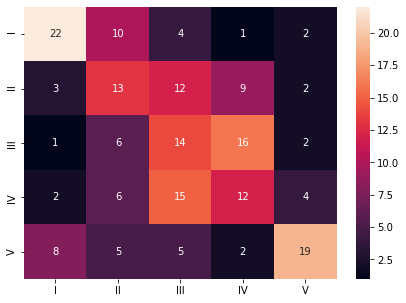

In [46]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

print(model.evaluate(X_ROS_, y_ROS_))
y_predict = model.predict(X_ROS_)

cm = metrics.confusion_matrix(y_ROS_.argmax(axis=1), pred1.argmax(axis=1), labels = [0,1,2,3,4])

df_cm = pd.DataFrame(cm , index = [i for i in ["I", "II","III","IV","V"]],
                    columns = [i for i in ["I","II","III","IV","V"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

#### This state that we have classified:
    1. Around 58% of class I Accidents
    2. 36 % of class II Accidents
    3. 32 % of class III Accidents
    4. 33 % of class IV Accidents
    5. 62 % of class V Accidents

**Due to insufficiant data points we see less Accuracy in the report**

In [47]:
acct = []
mod = []
def get_accuracy(y,x):
    global t
    acct.append(x)
    mod.append(y)
    temp=pd.DataFrame(mod,columns=['Model'])
    temp1 = pd.DataFrame(acct,columns=['accuracy'])
    t =temp.join(temp1)
    print(t)

In [48]:

ace = pd.read_csv('Modelaccuracy.csv')

In [49]:
acc

0.41025641560554504

In [50]:
get_accuracy('LSTM NN',acc)

     Model  accuracy
0  LSTM NN  0.410256


In [51]:
t

,Model,accuracy
0,LSTM NN,0.410256


In [52]:
ace.drop('Unnamed: 0',axis=1,inplace=True)

In [53]:
_ace=ace.append(t)

In [54]:
_ace.shape

(13, 2)

In [55]:
_ace

,Model,accuracy
0,RandomForestClassifier,0.400000
1,RandomForestClassifier GloVe,0.445312
2,DecisionTreeClassifier,0.421875
3,BernoulliNB,0.414062
4,BaggingClassifier,0.406250
5,RandomForestClassifier SMOTE,0.356322
6,DecisionTreeClassifier SMOTE,0.344828
7,SGDClassifier SMOTE,0.333333
8,BernoulliNB SMOTE,0.471264
9,BaggingClassifier SMOTE,0.356322


In [56]:
_ace

,Model,accuracy
0,RandomForestClassifier,0.400000
1,RandomForestClassifier GloVe,0.445312
2,DecisionTreeClassifier,0.421875
3,BernoulliNB,0.414062
4,BaggingClassifier,0.406250
5,RandomForestClassifier SMOTE,0.356322
6,DecisionTreeClassifier SMOTE,0.344828
7,SGDClassifier SMOTE,0.333333
8,BernoulliNB SMOTE,0.471264
9,BaggingClassifier SMOTE,0.356322


In [57]:
_ace.to_csv('Modelaccuracy.csv')